### Ridge Regression

Ridge Regression is a type of linear regression that includes a regularization term to prevent overfitting. It is also known as Tikhonov regularization.

#### Concept

In ordinary linear regression, we aim to minimize the sum of squared errors (SSE) between the predicted and actual values. The objective function for ordinary linear regression is:

$$
J(\beta) = \sum_{i=1}^{N} (y_i - \hat{y_i})^2
$$

Where:
$$
\begin{array}{ll}
y_i & \text{is the actual value.} \\
\hat{y_i} & \text{is the predicted value.} \\
N & \text{is the number of observations.} \\
\beta & \text{are the model coefficients.}
\end{array}
$$

Ridge Regression modifies the cost function by adding a penalty term proportional to the sum of the squares of the coefficients. The modified cost function is:

$$
J(\beta) = \sum_{i=1}^{N} (y_i - \hat{y_i})^2 + \lambda \sum_{j=1}^{p} \beta_j^2
$$

Where:
$$
\begin{array}{ll}
\lambda & \text{is the regularization parameter.} \\
\beta_j & \text{are the model coefficients.} \\
p & \text{is the number of predictors (features).}
\end{array}
$$

#### Purpose of Regularization

The purpose of adding the regularization term is to reduce the flexibility of coefficients, which helps to reduce model complexity and prevent overfitting. The regularization parameter $ \lambda $ controls the strength of the penalty:
- When $ \lambda $ = 0, Ridge Regression becomes ordinary linear regression.
- When $ \lambda $ is very large, the coefficients are heavily penalized and approach zero.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

Best alpha for Ridge: 3.906939937054621
Ridge Regression - Mean Squared Error: 0.5305, R-squared: 0.5958


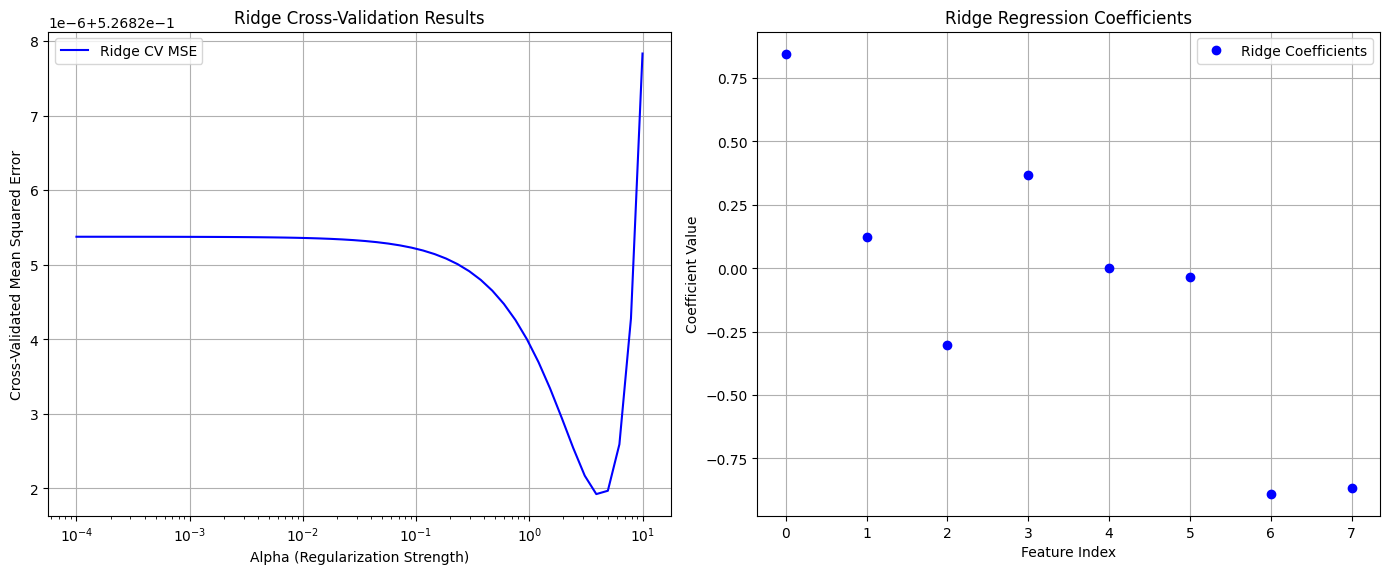

In [3]:
# Load the California Housing dataset
california = fetch_california_housing()
X = california.data
y = california.target

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Define a range of alpha (lambda) values
alphas = np.logspace(-3, 2, 50)

# Use cross-validation to evaluate Ridge regression with different alphas
ridge_cv_scores = []

for alpha in alphas:
    ridge_model = Ridge(alpha=alpha)
    ridge_cv_score = np.mean(cross_val_score(ridge_model, X_train, y_train, cv=5,
                                             scoring='neg_mean_squared_error'))
    ridge_cv_scores.append(-ridge_cv_score)

# Find the best alpha value
best_alpha_ridge = alphas[np.argmin(ridge_cv_scores)]
print(f'Best alpha for Ridge: {best_alpha_ridge}')

# Train the final Ridge model with the best alpha value
ridge_model = Ridge(alpha=best_alpha_ridge)
ridge_model.fit(X_train, y_train)

# Predict on the test set
y_pred_ridge = ridge_model.predict(X_test)

# Evaluate the model
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
print(f'Ridge Regression - Mean Squared Error: {mse_ridge:.4f}, R-squared: {r2_ridge:.4f}')

# Plot the cross-validation results
plt.figure(figsize=(14, 6))

# Cross-validation MSE plot
plt.subplot(1, 2, 1)
plt.plot(alphas, ridge_cv_scores, label='Ridge CV MSE', color='blue')
plt.xscale('log')
plt.xlabel('Alpha (Regularization Strength)')
plt.ylabel('Cross-Validated Mean Squared Error')
plt.title('Ridge Cross-Validation Results')
plt.legend()
plt.grid(True)

# Plot the final coefficients
plt.subplot(1, 2, 2)
plt.plot(ridge_model.coef_, marker='o', linestyle='none', label='Ridge Coefficients', color='blue')
plt.xlabel('Feature Index')
plt.ylabel('Coefficient Value')
plt.title('Ridge Regression Coefficients')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
